In [1]:

# MultiTaskLasso 是一个估计多元回归稀疏系数的线性模型
# y 是一个形状为(n_samples, n_tasks) 的二维数组，其约束条件和其他回归问题（也称为任务）是一样的，都是所选的特征值。


In [7]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relavent_features = 5

coef = np.zeros((n_tasks, n_features))

times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relavent_features):
    coef[:, k] = np.sin( (1. + rng.randn(1)) * times + 3 * rng.randn(1) )
    
coef

Automatically created module for IPython interactive environment


In [12]:
X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X,Y).coef_


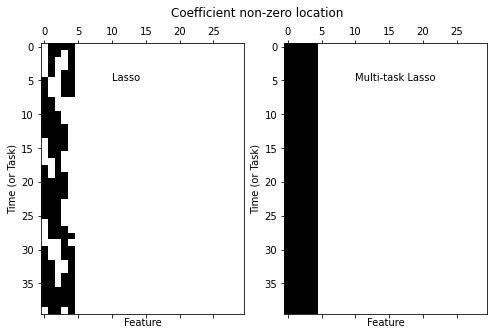

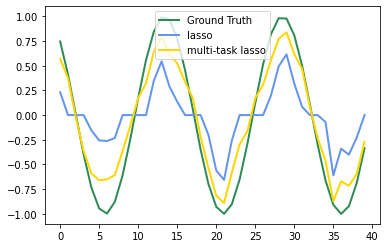

In [19]:
# #############################################################################
# Plot support and time series

fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')

plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Multi-task Lasso')
fig.suptitle('Coefficient non-zero location')

# 第几个特征
feature_to_plot = 3
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw, label='Ground Truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw, label='lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw, label='multi-task lasso')

plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])

plt.show()
